# Importing Libraries

In [ ]:
# install Pycaret
# pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.impute import SimpleImputer

from pycaret.regression import *

import warnings 
warnings.filterwarnings('ignore')

# EDA

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [3]:
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188533.0,94266.000000,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


# Data Preprocessing

In [6]:
train_df.drop('id', inplace=True, axis=1)
test_df.drop('id', inplace=True, axis=1)

### Train Data

In [7]:
train_df.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [8]:
train_df[train_df.isna().any(axis=1)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN,41998
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
45,RAM,1500 Laramie,2022,27352,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,42599
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
...,...,...,...,...,...,...,...,...,...,...,...,...
188507,Chevrolet,Corvette Stingray w/3LT,2023,3053,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,NaN,NaN,61999
188511,Land,Rover Range Rover Velar P380 SE R-Dynamic,2022,15198,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Firenze Red,Ebony,None reported,NaN,23739
188513,Lexus,GS 350 F Sport,2022,82046,Gasoline,3.5L V6 24V PDI DOHC,8-Speed Automatic,Caviar,Black,None reported,NaN,48990
188520,Mercedes-Benz,GLC 300 GLC 300,2022,18031,Gasoline,2.0 Liter Turbo,Automatic,White,Black,None reported,NaN,39998


In [9]:
# fillna for train data
imputer= SimpleImputer(strategy='most_frequent')
train_df[['fuel_type','accident','clean_title']]=imputer.fit_transform(train_df[['fuel_type','accident','clean_title']])

In [10]:
train_df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

### Test Data

In [43]:
test_df.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [44]:
test_df[test_df.isna().any(axis=1)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
2,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
15,Jaguar,F-PACE S,2022,10906,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN
60,Mercedes-Benz,GLC 300 GLC 300,2018,88149,Gasoline,2.0 Liter Turbo,Automatic,Black,–,At least 1 accident or damage reported,NaN
63,Ford,F-250 Platinum,2019,85149,Diesel,6.7L V8 32V DDI OHV Turbo Diesel,Automatic,Antimatter Blue Metallic,Ebony,None reported,NaN
...,...,...,...,...,...,...,...,...,...,...,...
125661,Mercedes-Benz,C-Class C 300 4MATIC,2020,27158,Gasoline,2.0 Liter Turbo,Automatic,White,Silk Beige/Espresso Brown,None reported,NaN
125668,Tesla,Model S 100D,2018,58000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Black,None reported,Yes
125677,Tesla,Model 3 Long Range,2019,69548,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes
125684,Tesla,Model S 85,2014,67647,NaN,362.0HP Electric Motor Electric Fuel System,1-Speed A/T,Blue,Black,At least 1 accident or damage reported,Yes


In [45]:
# fillna for train data
imputer= SimpleImputer(strategy='most_frequent')
test_df[['fuel_type','accident','clean_title']]=imputer.fit_transform(test_df[['fuel_type','accident','clean_title']])

In [46]:
test_df.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

### Encoding

#### Label encodeing for train data

In [15]:
cat_col = train_df.select_dtypes(include=['object']).columns
cat_col

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [16]:
encode = LabelEncoder()

# check columns and apply LabelEncoder to categorical columns
for col in cat_col:
    train_df[col] = encode.fit_transform(train_df[col])
train_df    

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,31,495,2007,213000,2,116,38,312,71,1,0,4200
1,28,930,2002,143250,2,366,38,263,10,0,0,4999
2,9,1575,2002,136731,1,640,38,38,71,1,0,13900
3,16,758,2017,19500,2,863,49,29,14,1,0,45000
4,36,1077,2021,7388,2,259,23,29,10,1,0,97500
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,8,604,2017,49000,2,866,49,304,10,1,0,27500
188529,36,206,2018,28600,2,770,31,304,14,0,0,30000
188530,36,223,2021,13650,2,921,23,304,14,1,0,86900
188531,3,1471,2022,13895,2,512,1,82,14,1,0,84900


#### Label encodeing for test data

In [47]:
cat_col = test_df.select_dtypes(include=['object']).columns
cat_col

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [48]:
encode = LabelEncoder()

# check columns and apply LabelEncoder to categorical columns
for col in cat_col:
    test_df[col] = encode.fit_transform(test_df[col])
test_df    

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,26,1388,2015,98000,2,326,16,302,10,1,0
1,26,1375,2020,9142,3,787,31,261,14,1,0
2,14,636,2022,28121,2,541,3,302,57,1,0
3,3,182,2016,61258,2,193,39,259,14,1,0
4,3,181,2018,59000,2,365,38,127,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...
125685,36,759,2014,83315,2,732,23,29,14,1,0
125686,3,1248,2019,29336,2,511,39,302,14,1,0
125687,3,184,2012,77634,2,673,38,29,14,1,0
125688,3,1244,2012,112000,2,673,38,29,14,1,0


### Data Spliting

In [19]:
X = train_df.drop('price', axis=1)
y = train_df['price']

### Scaling

**scaling train data**

In [20]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

**scaling test data**

In [49]:
scaled_test_features  = scale.fit_transform(test_df)
test_df_scaled = pd.DataFrame(scaled_test_features, columns=test_df.columns)  # Convert back to DataFrame

#### Split data into train & test

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=42, shuffle= True)

# ML Model

In [23]:
# models = {
#     'Linear Regression': LinearRegression(),
#     'Random Forest': RandomForestRegressor(),
#     'Decision Tree': DecisionTreeRegressor(),
#     'Support Vector Regressor': SVR(),
# }

# results = {}

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_valid)

#     mse = mean_squared_error(y_valid, y_pred)
#     r2 = r2_score(y_valid, y_pred)

#     results[name] = {'MSE': mse, 'R²': r2}

# # Convert results to DataFrame for better visualization
# results_df = pd.DataFrame(results).T
# print(results_df)

In [27]:
# Data preparation
regression_setup = setup(data=train_df, target='price', session_id=42)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(188533, 12)"
4,Transformed data shape,"(188533, 12)"
5,Transformed train set shape,"(131973, 12)"
6,Transformed test set shape,"(56560, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [29]:
# Compare models and choose the best
best_model = compare_models()

print("Best Model : ", best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,19834.1134,5729397742.8508,75186.3077,0.1395,0.5552,0.5452,7.1530
lightgbm,Light Gradient Boosting Machine,19849.0947,5757881850.5763,75382.2489,0.1349,0.5518,0.5355,1.5690
ada,AdaBoost Regressor,22077.2620,5950946482.3867,76688.5071,0.1035,0.6214,0.6506,0.5730
catboost,CatBoost Regressor,20038.7468,5990529973.2150,76917.5320,0.0984,0.5567,0.5392,15.0590
lasso,Lasso Regression,23356.3481,5990612216.3450,76937.7262,0.0979,0.7551,0.7735,0.0960
ridge,Ridge Regression,23356.4752,5990612202.0062,76937.7263,0.0979,0.7549,0.7735,0.0590
lar,Least Angle Regression,23356.4804,5990612208.6612,76937.7263,0.0979,0.7549,0.7735,0.0600
llar,Lasso Least Angle Regression,23356.3481,5990612216.4930,76937.7262,0.0979,0.7551,0.7735,0.0600
br,Bayesian Ridge,23347.9675,5990665058.0917,76938.0606,0.0979,0.7565,0.7729,0.1030
lr,Linear Regression,23356.4804,5990612208.6612,76937.7263,0.0979,0.7549,0.7735,0.6790


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Best Model :  GradientBoostingRegressor(random_state=42)


In [30]:
# Finalize the best model
final_model = finalize_model(best_model)

In [50]:
test_df_scaled

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,0.481481,0.734392,0.82,0.241788,0.333333,0.292115,0.313725,0.955696,0.064516,1.0,0.0
1,0.481481,0.727513,0.92,0.022331,0.500000,0.705197,0.607843,0.825949,0.090323,1.0,0.0
2,0.259259,0.336508,0.96,0.069205,0.333333,0.484767,0.058824,0.955696,0.367742,1.0,0.0
3,0.055556,0.096296,0.84,0.151045,0.333333,0.172939,0.764706,0.819620,0.090323,1.0,0.0
4,0.055556,0.095767,0.88,0.145468,0.333333,0.327061,0.745098,0.401899,0.090323,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
125685,0.666667,0.401587,0.80,0.205520,0.333333,0.655914,0.450980,0.091772,0.090323,1.0,0.0
125686,0.055556,0.660317,0.90,0.072205,0.333333,0.457885,0.764706,0.955696,0.090323,1.0,0.0
125687,0.055556,0.097354,0.76,0.191489,0.333333,0.603047,0.745098,0.091772,0.090323,1.0,0.0
125688,0.055556,0.658201,0.76,0.276365,0.333333,0.603047,0.745098,0.091772,0.090323,1.0,0.0


In [52]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['brand', 'model', 'model_year',
                                             'milage', 'fuel_type', 'engine',
                                             'transmission', 'ext_col',
                                             'int_col', 'accident',
                                             'clean_title'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=42))])

In [53]:
predict_model(final_model, data=test_df_scaled)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,prediction_label
0,0.481481,0.734392,0.82,0.241788,0.333333,0.292115,0.313726,0.955696,0.064516,1.0,0.0,409192.101968
1,0.481481,0.727513,0.92,0.022331,0.500000,0.705197,0.607843,0.825949,0.090323,1.0,0.0,417420.053254
2,0.259259,0.336508,0.96,0.069205,0.333333,0.484767,0.058824,0.955696,0.367742,1.0,0.0,409192.101968
3,0.055556,0.096296,0.84,0.151045,0.333333,0.172939,0.764706,0.819620,0.090323,1.0,0.0,417420.053254
4,0.055556,0.095767,0.88,0.145468,0.333333,0.327061,0.745098,0.401899,0.090323,1.0,0.0,417420.053254
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,0.666667,0.401587,0.80,0.205520,0.333333,0.655914,0.450980,0.091772,0.090323,1.0,0.0,417534.662985
125686,0.055556,0.660317,0.90,0.072205,0.333333,0.457885,0.764706,0.955696,0.090323,1.0,0.0,417420.053254
125687,0.055556,0.097354,0.76,0.191489,0.333333,0.603047,0.745098,0.091772,0.090323,1.0,0.0,417420.053254
125688,0.055556,0.658201,0.76,0.276365,0.333333,0.603047,0.745098,0.091772,0.090323,1.0,0.0,417420.053254


In [51]:
predict_model(best_model, data=test_df_scaled)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,prediction_label
0,0.481481,0.734392,0.82,0.241788,0.333333,0.292115,0.313726,0.955696,0.064516,1.0,0.0,148372.245508
1,0.481481,0.727513,0.92,0.022331,0.500000,0.705197,0.607843,0.825949,0.090323,1.0,0.0,161643.518571
2,0.259259,0.336508,0.96,0.069205,0.333333,0.484767,0.058824,0.955696,0.367742,1.0,0.0,148372.245508
3,0.055556,0.096296,0.84,0.151045,0.333333,0.172939,0.764706,0.819620,0.090323,1.0,0.0,161643.518571
4,0.055556,0.095767,0.88,0.145468,0.333333,0.327061,0.745098,0.401899,0.090323,1.0,0.0,161643.518571
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,0.666667,0.401587,0.80,0.205520,0.333333,0.655914,0.450980,0.091772,0.090323,1.0,0.0,148372.245508
125686,0.055556,0.660317,0.90,0.072205,0.333333,0.457885,0.764706,0.955696,0.090323,1.0,0.0,161643.518571
125687,0.055556,0.097354,0.76,0.191489,0.333333,0.603047,0.745098,0.091772,0.090323,1.0,0.0,161643.518571
125688,0.055556,0.658201,0.76,0.276365,0.333333,0.603047,0.745098,0.091772,0.090323,1.0,0.0,161643.518571


In [55]:
# Make predictions on the test set
predictions = predict_model(final_model, data=test_df_scaled)

# Check the predictions
predictions.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,prediction_label
0,0.481481,0.734392,0.82,0.241788,0.333333,0.292115,0.313726,0.955696,0.064516,1.0,0.0,409192.101968
1,0.481481,0.727513,0.92,0.022331,0.500000,0.705197,0.607843,0.825949,0.090323,1.0,0.0,417420.053254
2,0.259259,0.336508,0.96,0.069205,0.333333,0.484767,0.058824,0.955696,0.367742,1.0,0.0,409192.101968
3,0.055556,0.096296,0.84,0.151045,0.333333,0.172939,0.764706,0.819620,0.090323,1.0,0.0,417420.053254
4,0.055556,0.095767,0.88,0.145468,0.333333,0.327061,0.745098,0.401899,0.090323,1.0,0.0,417420.053254


In [57]:
# Load the sample submission file
submission = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')

# Update the 'price' column with predictions
submission['price'] = predictions['prediction_label']  # 'Label' contains the predicted prices

# Save the updated submission file
submission.to_csv('submission_pycaret.csv', index=False)

print("Submission file saved as 'submission_pycaret.csv'.")

Submission file saved as 'submission_pycaret.csv'.


In [58]:
submission

,id,price
0,188533,409192.101968
1,188534,417420.053254
2,188535,409192.101968
3,188536,417420.053254
4,188537,417420.053254
...,...,...
125685,314218,417534.662985
125686,314219,417420.053254
125687,314220,417420.053254
125688,314221,417420.053254


# ANN Model

In [60]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam, Adamax

In [61]:
X_train.shape

(131973, 11)

In [63]:
model = Sequential([
    Dense(128, activation='relu', input_dim = 11),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile('adamax', loss = 'mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [64]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.2)

Epoch 1/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 7127726080.0000 - mean_absolute_error: 37046.9453 - val_loss: 7154681344.0000 - val_mean_absolute_error: 28556.7852
Epoch 2/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6082220032.0000 - mean_absolute_error: 27887.5020 - val_loss: 7076473344.0000 - val_mean_absolute_error: 27581.9023
Epoch 3/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6061289472.0000 - mean_absolute_error: 27315.1719 - val_loss: 6986018816.0000 - val_mean_absolute_error: 27037.0332
Epoch 4/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 6724529152.0000 - mean_absolute_error: 26606.1719 - val_loss: 6903021056.0000 - val_mean_absolute_error: 25605.8477
Epoch 5/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 5726553600.0000 - mean_absolute_error: 25083.6406 - val_loss: 6818769920.0000 - val_mean_absolute_error: 25052.0820
Epoch 6/100
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6822672384.0000 - mean_absolute_error: 24

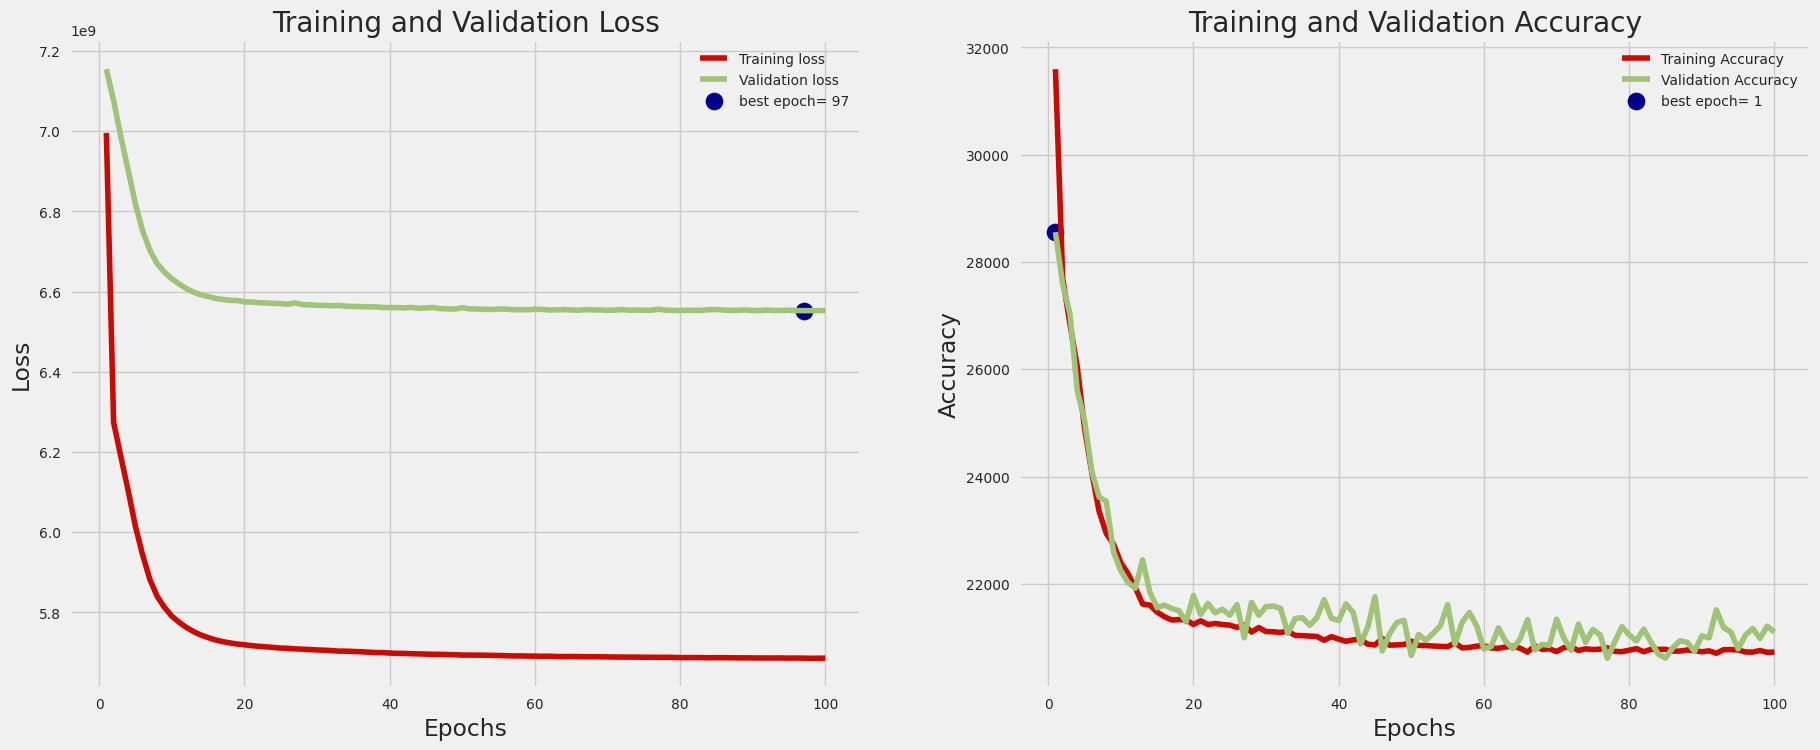

In [69]:
# Define needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'darkblue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'darkblue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [70]:
# Making predictions on 'test' data using the model, storing predictions as 'y_pred'
y_pred = model.predict(scaled_test_features)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [72]:
# Loading in Kaggle's sample submission file
submission = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')

In [73]:
# Applying predicted 'price' values to 'submission'
submission['price'] = y_pred
submission.head()

,id,price
0,188533,19209.382812
1,188534,76602.000000
2,188535,54288.207031
3,188536,24755.730469
4,188537,30608.964844


In [74]:
# Exporting 'submission' as a .csv for scoring
submission.to_csv('submission_ANN.csv', index=False)